In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from datetime import datetime

In [14]:
df = pd.read_csv("shampoo.csv")
df.head(5)

,Month,Sales
0,2021-01,266.0
1,2021-02,145.9
2,2021-03,183.1
3,2021-04,119.3
4,2021-05,180.3


In [15]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Sales
0,2021-01-01,266.0
1,2021-02-01,145.9
2,2021-03-01,183.1
3,2021-04-01,119.3
4,2021-05-01,180.3


In [17]:
df = df.set_index('Month')
df.head()

,Sales
Month,
2021-01-01,266.0
2021-02-01,145.9
2021-03-01,183.1
2021-04-01,119.3
2021-05-01,180.3


<Axes: xlabel='Month'>

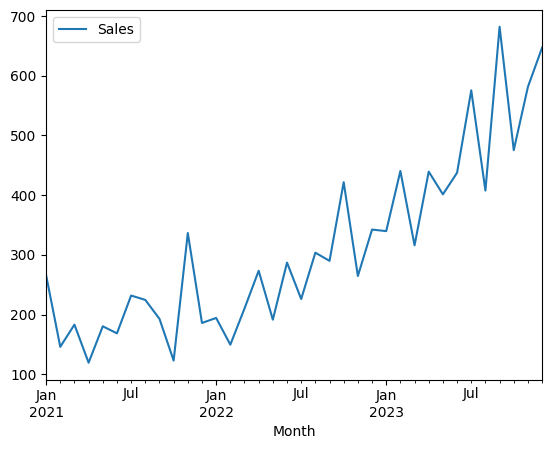

In [18]:
df.plot()

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
ans = adfuller(df)
print(ans)

(3.0601420836411815, 1.0, 10, 25, {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004}, 278.9972644263031)


In [34]:
df['new_v'] = df-df.shift(1)
df.head()

,Sales,new_v
Month,,
2021-01-01,266.0,NaN
2021-02-01,145.9,-120.1
2021-03-01,183.1,37.2
2021-04-01,119.3,-63.8
2021-05-01,180.3,61.0


In [37]:
adfuller(df['new_v'].dropna())
# print(ans)

(-7.249074055553854,
 1.7998574141687034e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=406.022, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=409.013, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=429.229, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=403.628, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=404.692, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=404.286, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=402.467, Time=0.18 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=401.529, Time=0.20 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.33 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec

Best 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -195.765
Date:                Thu, 25 Jan 2024   AIC                            401.529
Time:                        01:46:50   BIC                            409.306
Sample:                    02-01-2021   HQIC                           404.214
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3730      6.166      1.520      0.128      -2.712      21.458
ar.L1          0.0923      0.311      0.297      0.767      -0.518       0.703
ma.L1         -1.3961      0.375     -3.719      0.000      -2.132      -0.660
ma.L2          0.9531      0.537      1.775      0.076      -0.099       2.006
sigma2      3666.1921   1670.625      2.195      0.028     391.827    6940.557
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.63   Prob(JB):                         0.66
Heteroskedasticity (H):               0.95   Skew:                             0.31
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
size = int(len(df)*0.66)
train = df[:size]
test = df[size:]


In [44]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [45]:
arima_model = auto_arima(df['new_v'].dropna(),trace=True)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=406.022, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=409.013, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=429.229, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=403.628, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=404.692, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=404.286, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=402.467, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=401.529, Time=0.23 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.30 sec
 ARIMA(0,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   35
Model:               SARIMAX(1, 0, 2)   Log Likelihood                -195.765
Date:                Thu, 25 Jan 2024   AIC                            401.529
Time:                        01:55:03   BIC                            409.306
Sample:                    02-01-2021   HQIC                           404.214
                         - 12-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      9.3730      6.166      1.520      0.128      -2.712      21.458
ar.L1          0.0923      0.311      0.297      0.767      -0.518       0.703
ma.L1         -1.3961      0.375     -3.719      0.000      -2.132      -0.660
ma.L2          0.9531      0.537      1.775      0.076      -0.099       2.006
sigma2      3666.1921   1670.625      2.195      0.028     391.827    6940.557
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.63   Prob(JB):                         0.66
Heteroskedasticity (H):               0.95   Skew:                             0.31
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [46]:
model = ARIMA(train['new_v'], order=(1,0,2))
result = model.fit()
result.summary()

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  new_v   No. Observations:                   23
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -121.724
Date:                Thu, 25 Jan 2024   AIC                            253.447
Time:                        01:55:13   BIC                            259.125
Sample:                    01-01-2021   HQIC                           254.875
                         - 11-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4461      3.021      2.134      0.033       0.526      12.366
ar.L1         -0.8589      0.348     -2.471      0.013      -1.540      -0.178
ma.L1         -0.3401    101.297     -0.003      0.997    -198.878     198.198
ma.L2         -0.6594     66.685     -0.010      0.992    -131.360     130.041
sigma2      3180.8670   3.21e+05      0.010      0.992   -6.26e+05    6.32e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                 1.97
Prob(Q):                              0.63   Prob(JB):                         0.37
Heteroskedasticity (H):               1.67   Skew:                             0.71
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
forecast_data = result.predict(start=len(train), end=len(df)-1,dynamic=True)
forecast_data.head()

2022-12-01    65.250619
2023-01-01   -45.105676
2023-02-01    50.724354
2023-03-01   -31.584904
2023-04-01    39.111244
Freq: MS, Name: predicted_mean, dtype: float64

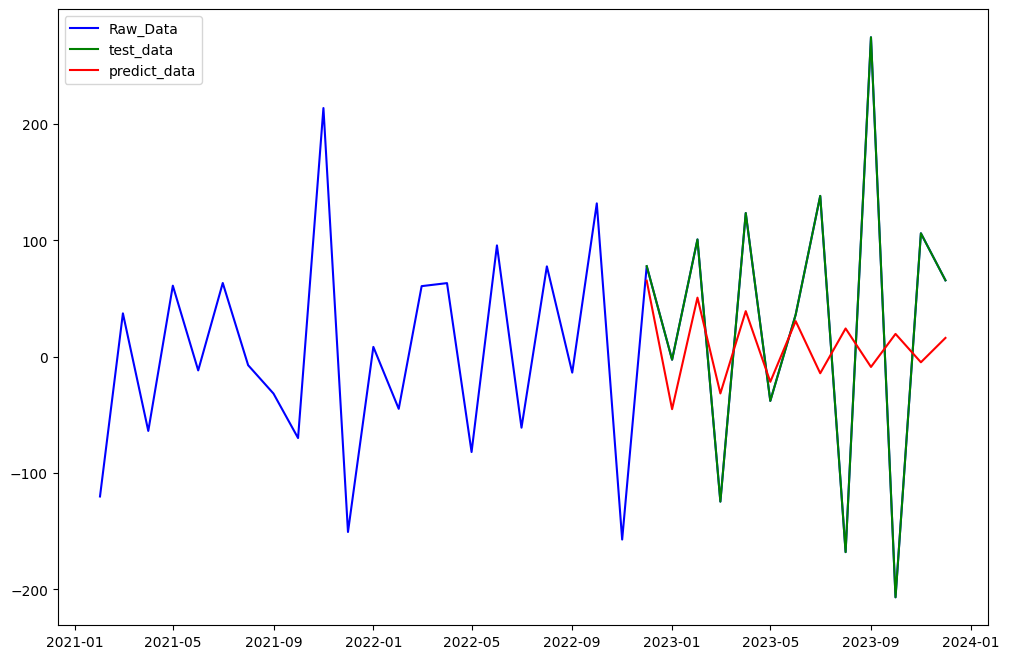

In [56]:
plt.figure(figsize=(12,8))
plt.plot(df['new_v'],label="Raw_Data", color="blue")
plt.plot(test['new_v'],label="test_data", color="green")
plt.plot(forecast_data,label="predict_data", color="red")
plt.legend()
plt.show()


In [57]:
from sklearn.metrics import mean_squared_error


rms = np.sqrt(mean_squared_error(test['new_v'], forecast_data))
rms

132.0722435269656

In [60]:
df['s_pred'] = df['Sales'].shift(1)+ forecast_data
df.tail()

,Sales,new_v,s_pred
Month,,,
2023-08-01,407.6,-167.9,599.723682
2023-09-01,682.0,274.4,398.776756
2023-10-01,475.3,-206.7,701.561053
2023-11-01,581.3,106.0,470.481530
2023-12-01,646.9,65.6,597.421317


In [62]:
rms = np.sqrt(mean_squared_error(df['s_pred'].dropna(),test['Sales']))
rms

132.07224352696556

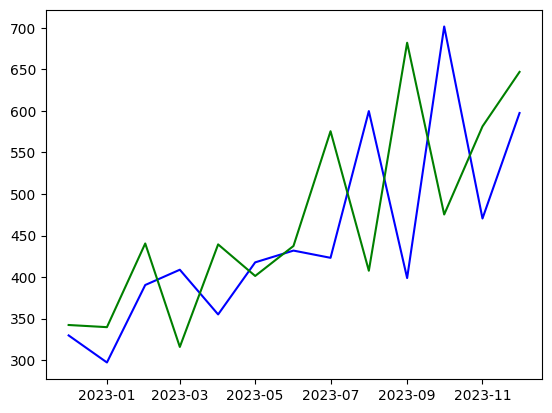

In [63]:
plt.plot(df['s_pred'],color='blue')
plt.plot(test['Sales'],color='green')